In [1]:
from tools import load
import numpy as np
import re
import math
import matplotlib.pyplot as plt

In [2]:
def bytify(x):
     return np.array(list('{0:03b}'.format(x))).astype(int)

def intify(x):
     return int("".join(list(x)),2)

def xor(a,b):
    return np.bitwise_xor(a,b)

def combo(a,A,B,C):
    assert a < 7, "ISSUE detected. Program broken"
    if a < 4:
        return a
    if a == 4:
        return A
    if a  == 5:
        return B
    if a == 6: 
        return C


# operators
def adv(c, A,B,C):
    return int(A / (2**combo(c,A,B,C))),B,C

def bxl(c, A,B,C):
    return A,xor(B, c),C

def bst(c, A,B,C):
    return A, combo(c,A,B,C)%8, C

def bxc(c, A,B,C):
    return A,xor(B,C),C

def bdv(c, A,B,C):
    return A,int(A / (2**combo(c,A,B,C))),C

def cdv(c, A,B,C):
    return A,B,int(A / (2**combo(c,A,B,C)))

In [3]:
instruct = {0: adv, 1: bxl, 2: bst,4: bxc, 6: bdv, 7:cdv}

In [4]:
# A 
terminated = False
ip = 0

data = load(line_splitter=False)
P = np.array(data[4][9:].split(",")).astype(int)
A = int(data[0].split(": ")[1])
B = int(data[1].split(": ")[1])
C = int(data[2].split(": ")[1])
out = []
ip_mem = []

for x in range(5000):

    if ip > (len(P)-2): 
        print(x)
        break
    else:
        ip_mem.append(ip)
    
    ins = P[ip]
    op = P[ip+1] 

    
    if ins == 3: 
        if A != 0: 
            ip = op
        else:
            ip +=2
    elif ins == 5:
        out.append(str(combo(op,A,B,C) % 8))
        ip += 2
    else:
        A,B,C = instruct[ins](op, A,B,C)
        ip += 2
res1 = ",".join(out)
res1

72


'6,5,7,4,5,7,3,1,0'

In [5]:
# B
# Determine the lowest possible str that returns the same amount of numbers.
investigate = []
terminated = False
ip = 0
data = load(line_splitter=False)
P = np.array(data[4][9:].split(",")).astype(int)
A = 35184372088831
B = int(data[1].split(": ")[1])
C = int(data[2].split(": ")[1])
out = []
ip_mem = []

for x in range(5000):

    if ip > (len(P)-2): 
        
        break
    else:
        ip_mem.append(ip)
    
    ins = P[ip]
    op = P[ip+1] 

    
    if ins == 3: 
        if A != 0: 
            ip = op
        else:
            ip +=2
    elif ins == 5:
        out.append(str(combo(op,A,B,C) % 8))
        ip += 2
    else:
        A,B,C = instruct[ins](op, A,B,C)
        ip += 2

print(len(out))

# 35184372088832 is the first number that produces the proper number of steps and with that output items
# 2**48-1 is the last number that produces the proper number of steps and with that output items

# Still a little too many options.
r1 =(2**48-1)
r2 =35184372088832

15


In [6]:
# B
# Determine the range which returns the proper last digit.


def investigate_digit(r1,r2,which=[-1,0], granularity= 10000):
    investigate = []
    for y in range(r2,r1, (r1-r2)//granularity):
        ip = 0
        data = load(line_splitter=False)
        P = np.array(data[4][9:].split(",")).astype(int)
        A = y
        B = int(data[1].split(": ")[1])
        C = int(data[2].split(": ")[1])
        out = []
        ip_mem = []

        for x in range(200000): #never runs that long.
            assert x <199999, "ISSUE"
            if ip > (len(P)-2): 
                break
            else:
                ip_mem.append(ip)
            
            ins = P[ip]
            op = P[ip+1] 

            
            if ins == 3: 
                if A != 0: 
                    ip = op
                else:
                    ip +=2
            elif ins == 5:
                out.append(str(combo(op,A,B,C) % 8))
                ip += 2
            else:
                A,B,C = instruct[ins](op, A,B,C)
                ip += 2

        investigate.append(out)

    last = np.array(investigate).astype(int).T[which[0]]
    earliest_index = np.where(last == which[1])[0][0] - 1
    lower = r2 + (r1-r2)//granularity * earliest_index
    

    constraint = last[earliest_index+1:]
    latest_index = earliest_index + np.where(constraint != which[1])[0][0] + 1
    upper = r2 + (r1-r2)//granularity * latest_index
    return last, lower,upper, earliest_index, latest_index

In [21]:
current_r1 = r1
current_r2 = r2
save = []
for x in range(1,4):
    inv1,current_r2, current_r1,b1,b2 = investigate_digit(current_r1,current_r2,which=[-x,P[-x]],granularity=10000)
    save.append(inv1)

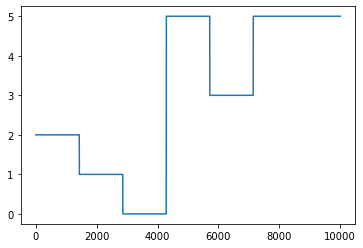

In [23]:
plt.plot(save[0])

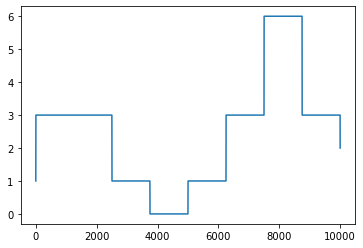

In [24]:
plt.plot(save[1])

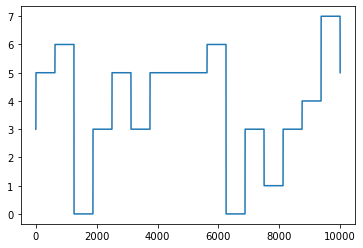

In [25]:
plt.plot(save[2])

In [13]:
data = load(line_splitter=False)
P = np.array(data[4][9:].split(",")).astype(int)
for y in range(current_r2,current_r2+10000):
    ip = 0
    A = y
    B = int(data[1].split(": ")[1])
    C = int(data[2].split(": ")[1])
    out = []
    ip_mem = []

    for x in range(200000): #never runs that long.
        assert x <199999, "ISSUE"
        if ip > (len(P)-2): 
            break
        else:
            ip_mem.append(ip)
        
        ins = P[ip]
        op = P[ip+1] 

        
        if ins == 3: 
            if A != 0: 
                ip = op
            else:
                ip +=2
        elif ins == 5:
            out.append(combo(op,A,B,C) % 8)
            ip += 2
        else:
            A,B,C = instruct[ins](op, A,B,C)
            ip += 2


    if np.all(P == out):
        print("Found")
        break



In [17]:
out

[3, 3, 3, 5, 7, 0, 6, 3, 0, 3, 1, 3, 3, 3, 1, 1]

In [11]:
P

array([2, 4, 1, 5, 7, 5, 0, 3, 1, 6, 4, 3, 5, 5, 3, 0])

In [21]:
np.all(P == investigate[-1])


False

In [15]:
investigate[-1]

[0, 7, 2, 6, 1, 6, 6, 2, 3, 3, 3, 7, 2, 5, 3, 0]

In [13]:
P

array([2, 4, 1, 5, 7, 5, 0, 3, 1, 6, 4, 3, 5, 5, 3, 0])

In [657]:
# LEts brute :)

105690544757598

In [637]:
inv1,r2_n, r1_n,b1,b2 = investigate_digit(r1,r2,which=[-1,0],granularity=10000)
plt.plot(inv1)
plt.vlines(b1,0,7,color="green")
plt.vlines(b2,0,7,color="red")

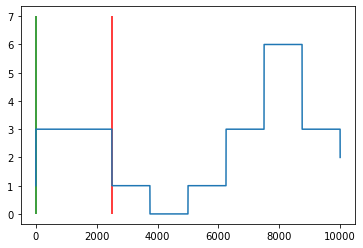

In [644]:
inv2,r2_n2, r1_n2,b3,b4 = investigate_digit(r1_n,r2_n, which=[-2,3],granularity=10000)
plt.plot(inv2)
plt.vlines(b3,0,7,color="green")
plt.vlines(b4,0,7,color="red")

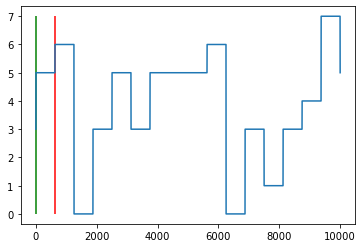

In [646]:
inv3,r2_n3, r1_n3,b5,b6 = investigate_digit(r1_n2,r2_n2, which=[-3,5],granularity=10000)
plt.plot(inv3)
plt.vlines(b5,0,7,color="green")
plt.vlines(b6,0,7,color="red")

In [651]:
(r1_n3 - r2_n3) /(r1_n - r2_n)

0.015656259995038377

In [617]:
r1_n3 - r2_n3

31888233898461

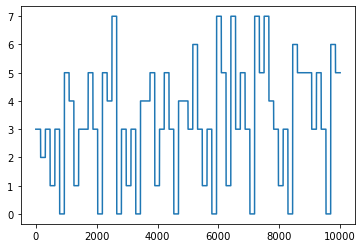

In [613]:
plt.plot(inv3)

In [ ]:
# Lets try :)
# B

investigate = []
for y in range(r2_n3,r1_n3):
    ip = 0
    data = load(line_splitter=False)
    P = np.array(data[4][9:].split(",")).astype(int)
    A = y
    B = int(data[1].split(": ")[1])
    C = int(data[2].split(": ")[1])
    out = []
    ip_mem = []

    for x in range(200000): #never runs that long.
        assert x <199999, "ISSUE"
        if ip > (len(P)-2): 
            break
        else:
            ip_mem.append(ip)
        
        ins = P[ip]
        op = P[ip+1] 

        
        if ins == 3: 
            if A != 0: 
                ip = op
            else:
                ip +=2
        elif ins == 5:
            out.append(str(combo(op,A,B,C) % 8))
            ip += 2
        else:
            A,B,C = instruct[ins](op, A,B,C)
            ip += 2

    investigate.append(out)
    if y 

In [585]:
inv2,r2_n2, r1_n2 = investigate_last_digit(r1_n,r2_n)


In [591]:
(r1_n - r2_n) / (r1 - r2)

0.1428999999989423

In [589]:
r1_n - r2_n

35194927400198

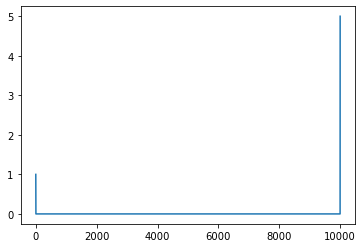

In [586]:
last = np.array(inv2).astype(int).T[-1]
plt.plot(last)

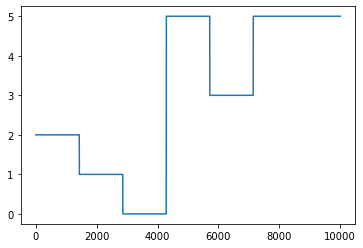

In [582]:
last = np.array(inv1).astype(int).T[-1]
plt.plot(last)


In [566]:
r2

105574226889228

In [567]:
r1

140719896168503

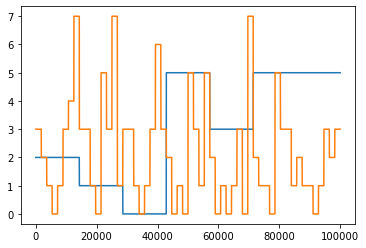

In [557]:
# There seems to be only one subspace that gives us 0. Now we simply need to check in the left border region.
last = np.array(investigate).astype(int).T[-1]
plt.plot(last)
# There seems to be only one subspace that gives us . Now we simply need to check in the left border region.
last = np.array(investigate).astype(int).T[-2]
plt.plot(last)

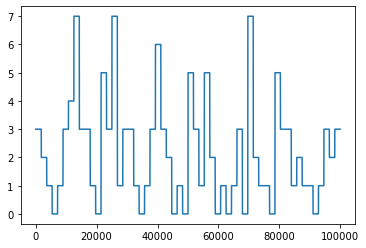

In [545]:
# There seems to be only one subspace that gives us 0. Now we simply need to check in the left border region.
last = np.array(investigate).astype(int).T[-2]
plt.plot(last)

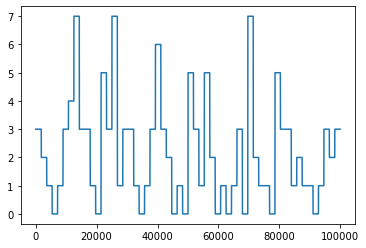

In [556]:
# There seems to be only one subspace that gives us 0. Now we simply need to check in the left border region.
last = np.array(investigate).astype(int).T[-2]
plt.plot(last)

In [501]:
len(investigate[-2])

16

In [ ]:
in

In [496]:
counter

287

In [491]:
len(investigate)

1000

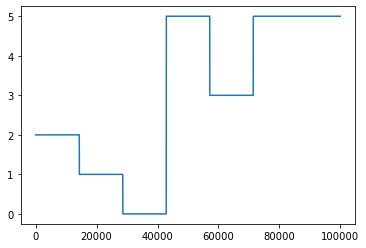

In [506]:
# There seems to be only one subspace that gives us 0. Now we simply need to check in the left border region.
last = np.array(investigate).astype(int).T[-1]
plt.plot(last)

In [523]:
np.where(last == 0)[0]

array([28572, 28573, 28574, ..., 42855, 42856, 42857])

In [532]:
r2

35184372088832

In [536]:
r1 - r2

246290604621823

In [538]:
r2

35184372088832

281474976710655

In [537]:
r2 + (r1-r2)//100000

35186834994878

In [518]:
lower = r2 + (r1-r2)//100000 * np.where(last == 0)[0][0]
upper = r2 + (r1-r2)//100000 * np.where(last == 0)[0][-1]

In [531]:
(r1-r2)//100000 * np.where(last == 0)[0][-1] - (r1-r2)//100000 * np.where(last == 0)[0][0]

35182612867110

In [542]:
246290604621823

246290604621823

In [521]:
35184372088832

35184372088832

In [515]:
# A 
terminated = False
ip = 0

data = load(line_splitter=False)
P = np.array(data[4][9:].split(",")).astype(int)
A = upper
B = int(data[1].split(": ")[1])
C = int(data[2].split(": ")[1])
out = []
ip_mem = []

for x in range(5000):

    if ip > (len(P)-2): 
        print(x)
        break
    else:
        ip_mem.append(ip)
    
    ins = P[ip]
    op = P[ip+1] 

    
    if ins == 3: 
        if A != 0: 
            ip = op
        else:
            ip +=2
    elif ins == 5:
        out.append(str(combo(op,A,B,C) % 8))
        ip += 2
    else:
        A,B,C = instruct[ins](op, A,B,C)
        ip += 2
res1 = ",".join(out)
res1

128


'5,1,1,6,0,3,4,3,1,1,2,3,3,5,3,0'

'5,1,1,6,0,3,4,3,1,1,2,3,3,5,3,0'

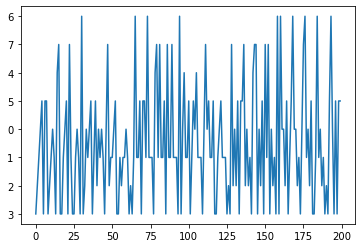

In [211]:
plt.plot(investigate)

In [ ]:
# For the first Round: 



A%8 # only last 3 digits relevant
A / 8 # only last 3 digits relevant
A / 8 
# Programm insights: 
# If the last number is 0 or divisible by 8 then the number is divisible by 8
# Only the last 3 digits of A are relevant



# B is ser to A%8
# B is set to Bxor5
# C is set to A  / 2*3
# A is set to A / 2*3
# B is set to Bxor6
# B is set to BxorC
# Out: B%8
# Then the programm repeats if A is not 0

# in Order to reproduce the last Digit: 
#  
#  A%8 = 0


#    
# First digit: 

# B is se to A%8 --> maximally 7

# B is set to Bxor5
# C is set to A  / 2*3
# A is set to A / 2*3
# B is set to Bxor6
# B is set to BxorC
# Out: B%8
# Then the programm repeats if A is not 0

# in Order to reproduce the last Digit: 
#  
#  A%8 = 0


#    
# In order to reproduce the first digit: 


inp %8 = R1

R1 xOR5 = R2
R2 xOR6 = R3
# If the last number is 0 or divisible by 8 then the number is divisible by 8
R3 %8 = 0
A%8 = 0 
# 5:101
# 6:110
191608 / (134217727 - 16777216)
134217727 - 16777216
A